In [13]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math

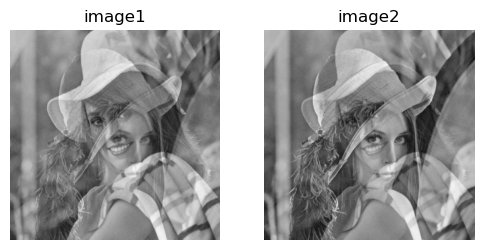

In [37]:
img1 = plt.imread("image1.png")
img2 = plt.imread("image2.png")

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title("image1")
plt.axis("off")
plt.imshow(img1, cmap="gray")

plt.subplot(2, 1, 1)
plt.title("image2")
plt.axis("off")
plt.imshow(img2, cmap="gray")

In [49]:
img1 = img1.reshape(1, -1)
img2 = img2.reshape(1, -1)
img1

array([[0.7019608, 0.7019608, 0.7019608, ..., 0.5568628, 0.5568628,
        0.5568628]], dtype=float32)

In [47]:
n = img1.shape[1]
n

262144

In [59]:
# 観測データ
mat_x = np.stack((img1, img2)).reshape(2, -1)
mat_x = np.asmatrix(mat_x)
mat_x = mat_x - np.mean(mat_x, axis=1)
print("観測データ mat_x = \n", mat_x)

# 共分散行列
mat_cov = mat_x @ mat_x.T / n
print("共分散行列 mat_cov = \n", mat_cov)

# mat_covを対角化する
eigenvalues, P = np.linalg.eig(mat_cov)
D = np.diag(eigenvalues)
P_inv = np.linalg.inv(P)
print("P = \n", P)
print("D = \n", D)
print("P^-1 = \n", P_inv)

# 行列Vを作る
D2 = np.diag(eigenvalues ** (-1/2))
mat_v = P @ D2 @ P_inv
print("V = \n", mat_v)

# 白色化後の行列
mat_z = mat_v @ mat_x
print("mat_z = \n", mat_z)

# mat_zの共分散行列は単位行列になるはず
print("mat_zの共分散行列(単位行列になるはず、、)\n", np.matmul(mat_z, mat_z.T) / n)

観測データ mat_x = 
 [[0.18737507 0.18737507 0.18737507 ... 0.04227704 0.04227704 0.04227704]
 [0.17349654 0.17349654 0.17349654 ... 0.0048691  0.0048691  0.01271224]]
共分散行列 mat_cov = 
 [[0.01785102 0.01676259]
 [0.01676259 0.01837442]]
P = 
 [[-0.71260444 -0.70156604]
 [ 0.70156604 -0.71260444]]
D = 
 [[0.00134809 0.        ]
 [0.         0.03487735]]
P^-1 = 
 [[-0.71260444  0.70156604]
 [-0.70156604 -0.71260444]]
V = 
 [[ 16.46600989 -10.93927721]
 [-10.93927721  16.12444021]]
mat_z = 
 [[ 1.18739294  1.18739294  1.18739294 ...  0.64286966  0.64286966
   0.55707141]
 [ 0.74778684  0.74778684  0.74778684 ... -0.38396867 -0.38396867
  -0.25750248]]
mat_zの共分散行列(単位行列になるはず、、)
 [[ 1.00000036e+00 -6.83136410e-07]
 [-6.83136410e-07  1.00000093e+00]]


In [63]:
#　Independent Component Analysis
def ica(seed):
    global mat_z
    mat_z = np.asarray(mat_z)
    np.random.seed(seed)
    w_prev = np.random.rand(2, 1)
    w_prev = w_prev / np.linalg.norm(w_prev)
    w = w_prev
    compare = np.array([[10, 10]])

    while np.linalg.norm(compare) > 0.000001:
        zwz3 = mat_z * ((w_prev.T @ mat_z) ** 3)
        zwz3 = zwz3.mean(axis = 1).reshape(-1, 1)
        w = zwz3 - 3 * w_prev
        if w[0] < 0:
            w = -w
        w = w / np.linalg.norm(w)
        compare = w_prev - w
        w_prev = w
        
    mat_z = np.asmatrix(mat_z)
    return w

In [119]:
w1 = -ica(1).T
w2 = ica(2).T
print(w1, w2)

[[-0.03361325  0.99943492]] [[ 0.99858373 -0.0532028 ]]


In [121]:
# w1とw2が異なっていることが確認できたので、
mat_w = np.stack((w1, w2)).reshape(2, -1)
print("mat_w = \n", mat_w)

# 信号源データ
mat_y = mat_w @ mat_z
mat_y = mat_y - np.min(mat_y, axis=1)
mat_y = np.asarray(mat_y) / np.max(mat_y, axis=1)
print("信号源データ mat_y = \n", mat_y)

mat_w = 
 [[-0.03361325  0.99943492]
 [ 0.99858373 -0.0532028 ]]
信号源データ mat_y = 
 [[0.61142616 0.61142616 0.61142616 ... 0.36989786 0.36989786 0.39795691]
 [0.75823495 0.75823495 0.75823495 ... 0.66712046 0.66712046 0.64970836]]


In [123]:
print(np.max(mat_y, axis=1))
print(np.min(mat_y, axis=1))

[[1.]
 [1.]]
[[0.]
 [0.]]


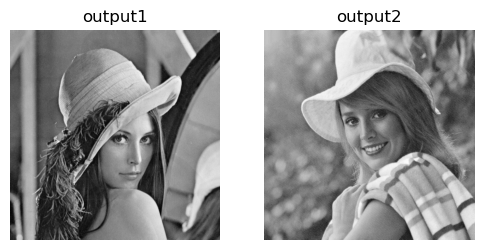

In [125]:
output1 = np.asarray(mat_y[0]).flatten()
output1 = output1.reshape(512, -1)
output2 = np.asarray(mat_y[1]).flatten()
output2 = output2.reshape(512, -1)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title("output1")
plt.axis("off")
plt.imshow(output1, cmap="gray")

plt.subplot(2, 1, 1)
plt.title("output2")
plt.axis("off")
plt.imshow(output2, cmap="gray")

In [127]:
plt.imsave("output1.png", output1, cmap="gray")
plt.imsave("output2.png", output2, cmap="gray")